# Setup

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import colors

import seaborn as sns
sns.set_style('whitegrid')

# Read Data

In [2]:
cols = ["P2O5", "K", "Mg", "pH"]

In [3]:
# read predictions and true data for trainingdata
path = '../../hyperview/random_forest/evaluation'
# idx all
y_hat_bls = np.load(os.path.join(path, "y_hat_bls_RandomForest_202205021710_nest=728_maxd=None_minsl=1.npy"))
y_hat_rfs = np.load(os.path.join(path, "y_hat_rfs_RandomForest_202205021710_nest=728_maxd=None_minsl=1.npy"))
y_vs = np.load(os.path.join(path, "y_vs_RandomForest_202205021710_nest=728_maxd=None_minsl=1.npy"))

In [4]:
print(f"y_hat_bls shape {y_hat_bls.shape}")
print(f"y_hat_rfs shape {y_hat_rfs.shape}")
print(f"y_vs shape {y_vs.shape}")

y_hat_bls shape (346400, 4)
y_hat_rfs shape (346400, 4)
y_vs shape (346400, 4)


## Plots: Real -vs Prediction

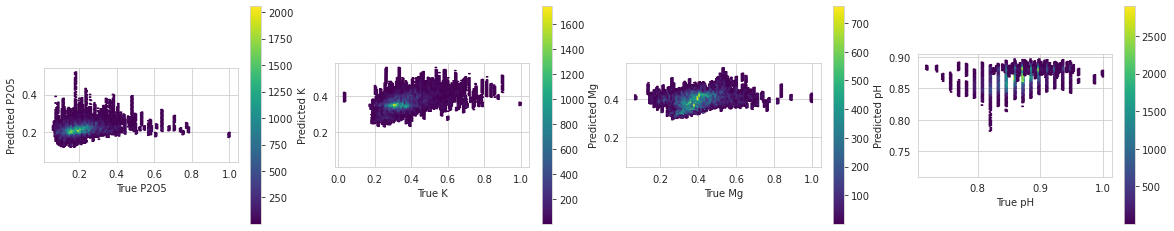

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs[:, i], y_hat_rfs[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])),
            np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

## Plots: Real - vs Baseline

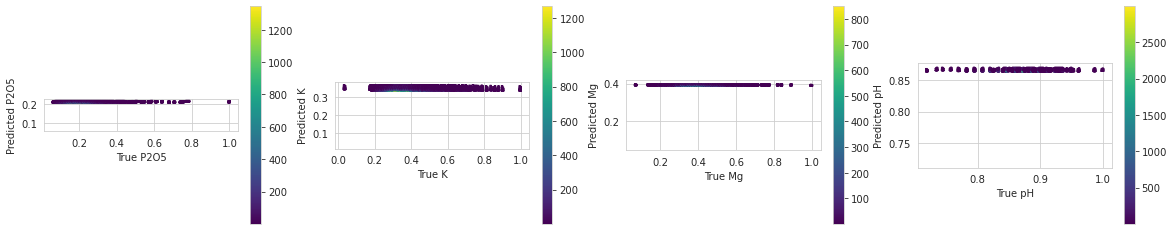

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs[:, i], y_hat_bls[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])),
            np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

## Prediction of 4 parameters separtely

In [33]:
y_hat_bls_s = []
y_hat_rfs_s = []
y_vs_s = []

In [34]:
# idx 0
name_bl_ix0 = "y_hat_bls_RandomForest_202205031318_nest=901_maxd=None_minsl=10.npy"
name_rf_ix0 = "y_hat_rfs_RandomForest_202205031318_nest=901_maxd=None_minsl=10.npy"
name_v_ix0 = "y_vs_RandomForest_202205031318_nest=901_maxd=None_minsl=10.npy"

#name_bl_ix0 = "y_hat_bls_RandomForest_202205051442_nest=814_maxd=Noneminsl=1.npy"
#name_rf_ix0 = "y_hat_rfs_RandomForest_202205051442_nest=814_maxd=None_minsl=1.npy"
#name_v_ix0 = "y_vs_RandomForest_202205051442_nest=814_maxd=None_minsl=1.npy"
y_hat_bls_s.append(np.load(os.path.join(path, name_rf_ix0)))
y_hat_rfs_s.append(np.load(os.path.join(path, name_bl_ix0)))
y_vs_s.append(np.load(os.path.join(path, name_v_ix0)))

In [35]:
# idx 1
y_hat_bls_s.append(np.load(os.path.join(path, "y_hat_bls_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))
y_hat_rfs_s.append(np.load(os.path.join(path, "y_hat_rfs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))
y_vs_s.append(np.load(os.path.join(path, "y_vs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))

In [36]:
# idx 2
y_hat_bls_s.append(np.load(os.path.join(path, "y_hat_bls_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))
y_hat_rfs_s.append(np.load(os.path.join(path, "y_hat_rfs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))
y_vs_s.append(np.load(os.path.join(path, "y_vs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))

In [37]:
# idx 3
y_hat_bls_s.append(np.load(os.path.join(path, "y_hat_bls_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy")))
y_hat_rfs_s.append(np.load(os.path.join(path, "y_hat_rfs_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy")))
y_vs_s.append(np.load(os.path.join(path, "y_vs_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy")))

In [38]:
y_vs_s[0].shape
#y_hat_bls_s[1].shape

(346400, 1)

In [39]:
y_hat_bls_s = [y_hat_bls_s[i].reshape(-1,1) for i in range(len(y_hat_bls_s))]
y_hat_rfs_s = [y_hat_rfs_s[i].reshape(-1,1) for i in range(len(y_hat_rfs_s))]

In [40]:
y_hat_bls_s = np.concatenate(y_hat_bls_s, axis=-1)
y_hat_rfs_s = np.concatenate(y_hat_rfs_s, axis=-1)
y_vs_s = np.concatenate(y_vs_s, axis=-1)

In [65]:
y_hat_rfs.shape

(346400, 4)

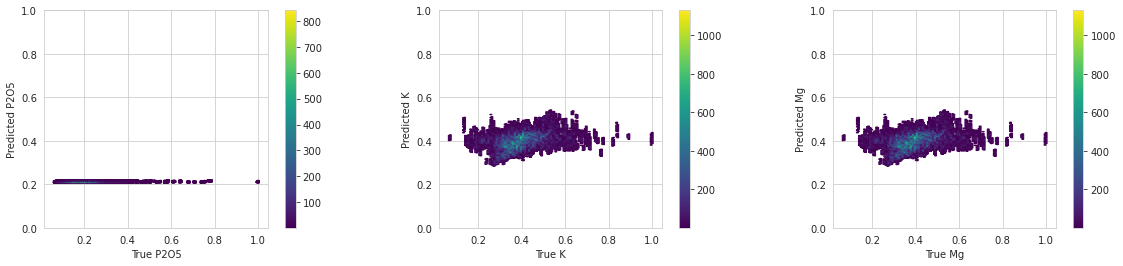

In [66]:
# ix 0: 0.9321552594721085
# ix 1: 
# ix 2: 0.8530452433725719
# ix 3: 0.7820406723958646
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs_s[:, i], y_hat_rfs_s[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs_s[:, i]), np.max(y_vs_s[:, i])),
            np.arange(np.min(y_vs_s[:, i]), np.max(y_vs_s[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_ylim([0,1])
    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

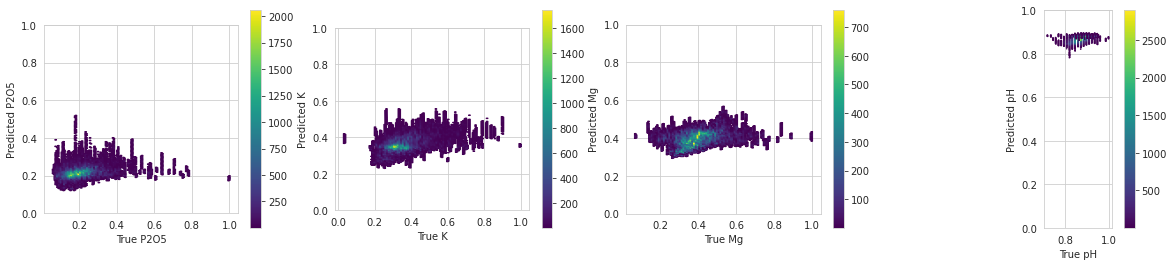

In [67]:
# all: 
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs[:, i], y_hat_rfs[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])),
            np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_ylim([0,1])
    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

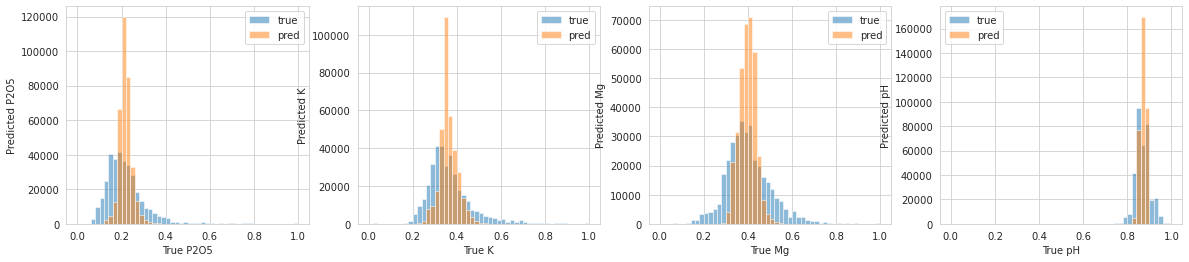

In [54]:
# ix all
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):

    # Compute frequency and bins
    frequency, bins = np.histogram(y_vs[:,i], bins=50, range=[0, 1])
    ax.hist(y_vs[:, i], alpha=0.5, bins=bins, label='true')
    ax.hist(y_hat_rfs[:, i], alpha=0.5, bins=bins, label='pred')
    ax.legend()
    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

IndexError: index 1 is out of bounds for axis 1 with size 1

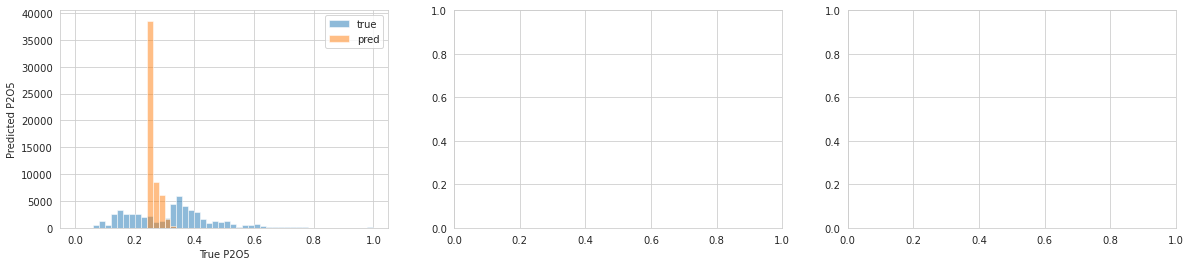

In [55]:
# ix single
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

for i, ax in enumerate(axs):

    # Compute frequency and bins
    frequency, bins = np.histogram(y_vs_s[:,i], bins=50, range=[0, 1])
    ax.hist(y_vs_s[:, i], alpha=0.5, bins=bins, label='true')
    ax.hist(y_hat_rfs_s[:, i], alpha=0.5, bins=bins, label='pred')
    ax.legend()
    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])